In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# untuk algoritma gaus dan multinomial 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# untuk algoritma k-nearest
from sklearn.neighbors import KNeighborsClassifier

# untuk data split
from sklearn.model_selection import train_test_split

# untuk menilai akurasi, klasifikasi
from sklearn.metrics import accuracy_score, classification_report

# untuk linear regression
from sklearn.linear_model import LinearRegression

# untuk langin warning
import warnings 
warnings.filterwarnings('ignore')

In [92]:
# read data
data = pd.read_csv('covid_vaccine_statewise.csv')
data.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [93]:
data.info() # Cek Info Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [94]:
data.isna().sum() # Cek Jumlah NaN

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [95]:
# import library untuk data cleaning
from sklearn.impute import SimpleImputer

# membuat variabel yang berisi strategi simple imputer
mean = SimpleImputer(strategy='mean')
df2 = data.copy()

# mengisi data NaN dari tiap tiap record
df2['Total Doses Administered'] = mean.fit_transform(df2[['Total Doses Administered']])
df2['Sessions'] = mean.fit_transform(df2[['Sessions']])
df2[' Sites '] = mean.fit_transform(df2[[' Sites ']])
df2['First Dose Administered'] = mean.fit_transform(df2[['First Dose Administered']])
df2['Second Dose Administered'] = mean.fit_transform(df2[['Second Dose Administered']])
df2['Male (Doses Administered)'] = mean.fit_transform(df2[['Male (Doses Administered)']])
df2['Female (Doses Administered)'] = mean.fit_transform(df2[['Female (Doses Administered)']])
df2['Transgender (Doses Administered)'] = mean.fit_transform(df2[['Transgender (Doses Administered)']])
df2[' Covaxin (Doses Administered)'] = mean.fit_transform(df2[[' Covaxin (Doses Administered)']])
df2['CoviShield (Doses Administered)'] = mean.fit_transform(df2[['Total Doses Administered']])
df2['Sputnik V (Doses Administered)'] = mean.fit_transform(df2[['CoviShield (Doses Administered)']])
df2['AEFI'] = mean.fit_transform(df2[['AEFI']])
df2['18-44 Years (Doses Administered)'] = mean.fit_transform(df2[['18-44 Years (Doses Administered)']])
df2['45-60 Years (Doses Administered)'] = mean.fit_transform(df2[['45-60 Years (Doses Administered)']])
df2['60+ Years (Doses Administered)'] = mean.fit_transform(df2[['60+ Years (Doses Administered)']])
df2['18-44 Years(Individuals Vaccinated)'] = mean.fit_transform(df2[['18-44 Years(Individuals Vaccinated)']])
df2['45-60 Years(Individuals Vaccinated)'] = mean.fit_transform(df2[['45-60 Years(Individuals Vaccinated)']])
df2['60+ Years(Individuals Vaccinated)'] = mean.fit_transform(df2[['60+ Years(Individuals Vaccinated)']])
df2['Male(Individuals Vaccinated)'] = mean.fit_transform(df2[['Male(Individuals Vaccinated)']])
df2['Female(Individuals Vaccinated)'] = mean.fit_transform(df2[['Female(Individuals Vaccinated)']])
df2['Transgender(Individuals Vaccinated)'] = mean.fit_transform(df2[['Transgender(Individuals Vaccinated)']])
df2['Total Individuals Vaccinated'] = mean.fit_transform(df2[['Total Individuals Vaccinated']])

# cek jumlah NaN tiap tiap atribut
df2.isna().sum()

Updated On                             0
State                                  0
Total Doses Administered               0
Sessions                               0
 Sites                                 0
First Dose Administered                0
Second Dose Administered               0
Male (Doses Administered)              0
Female (Doses Administered)            0
Transgender (Doses Administered)       0
 Covaxin (Doses Administered)          0
CoviShield (Doses Administered)        0
Sputnik V (Doses Administered)         0
AEFI                                   0
18-44 Years (Doses Administered)       0
45-60 Years (Doses Administered)       0
60+ Years (Doses Administered)         0
18-44 Years(Individuals Vaccinated)    0
45-60 Years(Individuals Vaccinated)    0
60+ Years(Individuals Vaccinated)      0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Individuals Vaccinated           0
dtype: int64

In [96]:
# data split 
dt = df2[["Total Doses Administered"]]
label = df2[["State"]]

dt_train, dt_test, label_train, label_test = train_test_split(dt, label, test_size= .2)

In [97]:
# untuk ngeprint panjang data yg sudah ter split beserta masing-masing labelnya 
print(f'panjang data training {len(dt_train)}',
     f'panjang label training {len(label_train)}',
     f'panjang data testing {len(dt_test)}',
     f'panjang label testing {len(label_test)}',
      sep='\n')

panjang data training 6276
panjang label training 6276
panjang data testing 1569
panjang label testing 1569


# Algoritma KNN

In [99]:
# mengklasifikasikan data 
classifier = KNeighborsClassifier(n_neighbors = 5)

In [100]:
# train data yg sudah diklasifikasi
classifier.fit(dt_train, label_train)

KNeighborsClassifier()

In [101]:
predicted_label = classifier.predict(dt_test)
akurasi_csf = accuracy_score(label_test, predicted_label)

In [102]:
print(f'Hasil Prediksi\t: {predicted_label}',
      f'Label\t\t: {label_test}',
      f'Akurasi\t\t: {akurasi_csf}',
     sep='\n')

Hasil Prediksi	: ['Andaman and Nicobar Islands' 'Bihar' 'Gujarat' ... 'Chhattisgarh'
 'Mizoram' 'Arunachal Pradesh']
Label		:                                          State
656                          Arunachal Pradesh
3155                         Jammu and Kashmir
3540                                 Karnataka
461                             Andhra Pradesh
4207                               Lakshadweep
...                                        ...
1733  Dadra and Nagar Haveli and Daman and Diu
4341                            Madhya Pradesh
6900                                 Telangana
7669                               West Bengal
3912                                    Ladakh

[1569 rows x 1 columns]
Akurasi		: 0.10516252390057361


In [103]:
classifier.score(dt_test, label_test)

0.10516252390057361

# Naive Bayes

In [104]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [105]:
GNB.fit(dt_train, label_train)

GaussianNB()

In [106]:
MNB.fit(dt_train, label_train)

MultinomialNB()

In [107]:
GNB_predict = GNB.predict(dt_test)
MNB_predict = MNB.predict(dt_test)

In [108]:
print("Gaussisan NB : ")
print(classification_report(label_test,GNB_predict))

Gaussisan NB : 
                                          precision    recall  f1-score   support

             Andaman and Nicobar Islands       0.07      0.95      0.12        42
                          Andhra Pradesh       0.00      0.00      0.00        46
                       Arunachal Pradesh       0.00      0.00      0.00        36
                                   Assam       0.00      0.00      0.00        44
                                   Bihar       0.00      0.00      0.00        52
                              Chandigarh       0.00      0.00      0.00        47
                            Chhattisgarh       0.16      0.29      0.21        45
Dadra and Nagar Haveli and Daman and Diu       0.00      0.00      0.00        49
                                   Delhi       0.00      0.00      0.00        40
                                     Goa       0.05      0.26      0.08        39
                                 Gujarat       0.03      0.02      0.03        43

In [109]:
print("Multinomial NB : ")
print(classification_report(label_test,MNB_predict))

Multinomial NB : 
                                          precision    recall  f1-score   support

             Andaman and Nicobar Islands       0.00      0.00      0.00        42
                          Andhra Pradesh       0.00      0.00      0.00        46
                       Arunachal Pradesh       0.00      0.00      0.00        36
                                   Assam       0.00      0.00      0.00        44
                                   Bihar       0.00      0.00      0.00        52
                              Chandigarh       0.00      0.00      0.00        47
                            Chhattisgarh       0.00      0.00      0.00        45
Dadra and Nagar Haveli and Daman and Diu       0.00      0.00      0.00        49
                                   Delhi       0.00      0.00      0.00        40
                                     Goa       0.00      0.00      0.00        39
                                 Gujarat       0.00      0.00      0.00        

In [110]:
predicted_nb = GNB.predict(dt_test)
akurasi_nb = accuracy_score(label_test, predicted_nb)

print(f'Hasil Prediksi\t: {predicted_nb}',
      f'Label\t\t: {label_test}',
      f'Akurasi\t\t: {akurasi_nb}',
     sep='\n')

Hasil Prediksi	: ['Andaman and Nicobar Islands' 'Punjab' 'Rajasthan' ... 'Punjab' 'Goa'
 'Andaman and Nicobar Islands']
Label		:                                          State
656                          Arunachal Pradesh
3155                         Jammu and Kashmir
3540                                 Karnataka
461                             Andhra Pradesh
4207                               Lakshadweep
...                                        ...
1733  Dadra and Nagar Haveli and Daman and Diu
4341                            Madhya Pradesh
6900                                 Telangana
7669                               West Bengal
3912                                    Ladakh

[1569 rows x 1 columns]
Akurasi		: 0.09623964308476737


In [111]:
predicted_nb = MNB.predict(dt_test)
akurasi_nb = accuracy_score(label_test, predicted_nb)

print(f'Hasil Prediksi\t: {predicted_label}',
      f'Label\t\t: {label_test}',
      f'Akurasi\t\t: {akurasi_csf}',
     sep='\n')

Hasil Prediksi	: ['Andaman and Nicobar Islands' 'Bihar' 'Gujarat' ... 'Chhattisgarh'
 'Mizoram' 'Arunachal Pradesh']
Label		:                                          State
656                          Arunachal Pradesh
3155                         Jammu and Kashmir
3540                                 Karnataka
461                             Andhra Pradesh
4207                               Lakshadweep
...                                        ...
1733  Dadra and Nagar Haveli and Daman and Diu
4341                            Madhya Pradesh
6900                                 Telangana
7669                               West Bengal
3912                                    Ladakh

[1569 rows x 1 columns]
Akurasi		: 0.10516252390057361


# Regresi

In [112]:
LR = LinearRegression()

In [113]:
LR.fit(df2[['First Dose Administered']],df2.AEFI)

LinearRegression()

# Perbandingan Akurasi

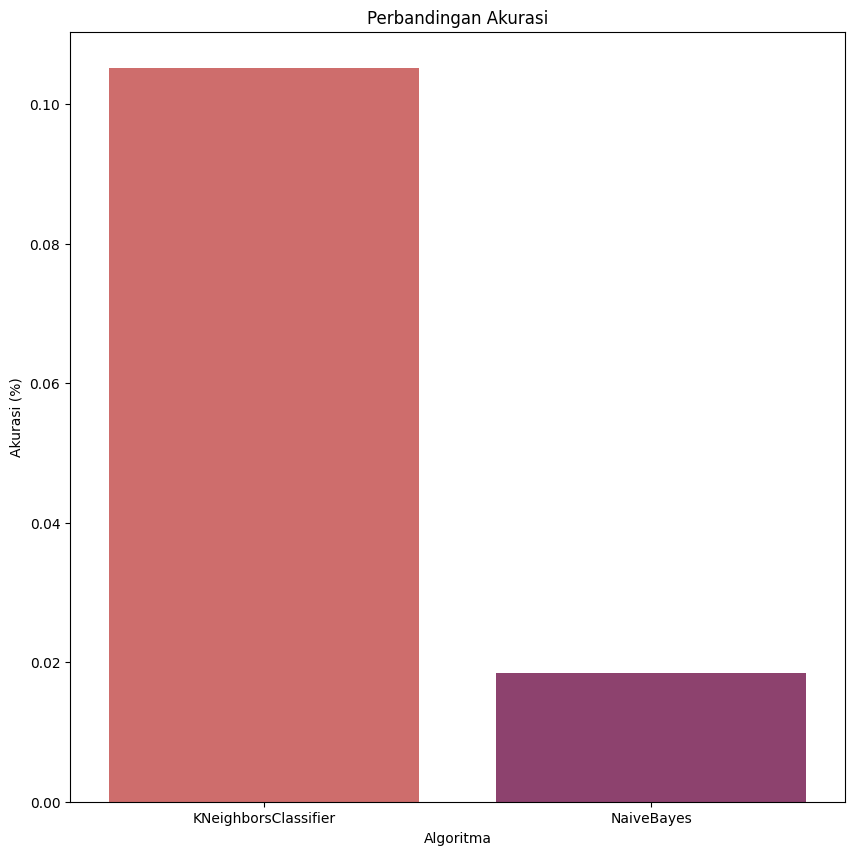

In [114]:
algoritma = ["KNeighborsClassifier","NaiveBayes"]
predict_value = [accuracy_score(label_test, predicted_label),accuracy_score(label_test, predicted_nb)]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = predict_value,palette='flare')

plt.title("Perbandingan Akurasi")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()